# Pandas

In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## indexing

In [6]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
df.iloc[0:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
tdf = df.loc[20:30]
tdf.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
20,5.4,3.4,1.7,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa


In [9]:
tdf.loc[21]

SepalLength            5.1
SepalWidth             3.7
PetalLength            1.5
PetalWidth             0.4
Name           Iris-setosa
Name: 21, dtype: object

In [10]:
tdf.loc[21:24, ['SepalWidth', 'PetalWidth']]

,SepalWidth,PetalWidth
21,3.7,0.4
22,3.6,0.2
23,3.3,0.5
24,3.4,0.2


## create dataframe

In [11]:
s1 = pd.Series([1, 2, 3])
s2 = pd.Series(['a', 'b', 'c'])
pd.DataFrame({'col_1': s1, 'col2': s2})

,col2,col_1
0,a,1
1,b,2
2,c,3


In [12]:
pd.DataFrame({'col_1': [1, 2, 3], 'col2': ['a', 'b', 'c']})

,col2,col_1
0,a,1
1,b,2
2,c,3


In [13]:
pd.DataFrame([
                [1, 2, 3], 
                ['a', 'b', 'c']
            ], 
            index=['row1', 'row2'],
            columns=['col1', 'col2', 'col3'])

,col1,col2,col3
row1,1,2,3
row2,a,b,c


## Some methods

In [14]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.mean()


SepalLength    5.843333
SepalWidth     3.054000
PetalLength    3.758667
PetalWidth     1.198667
dtype: float64

In [16]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


In [17]:
df.loc[(df.SepalLength < 5)&(df.PetalWidth > 0.3)]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
57,4.9,2.4,3.3,1.0,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica


In [18]:
df.groupby('Name').SepalWidth.mean()

Name
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: SepalWidth, dtype: float64

## Plotting

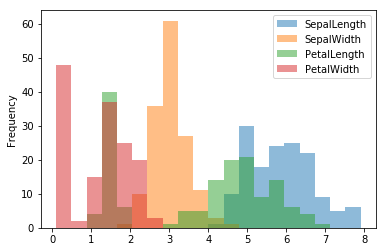

In [19]:
df.plot(kind='hist', alpha=0.5, bins=20)

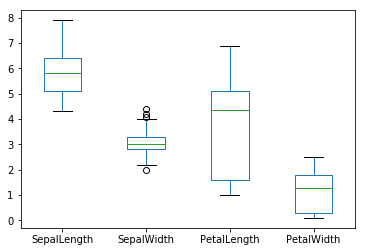

In [20]:
df.plot.box()

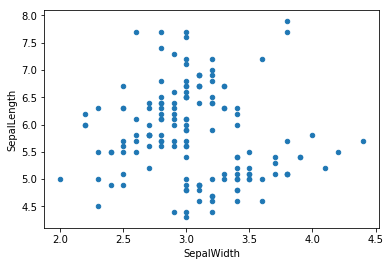

In [21]:
df.plot(x='SepalWidth', y='SepalLength', kind='scatter')

In [22]:
df.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

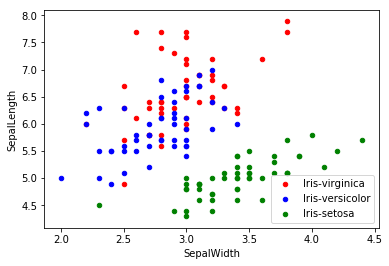

In [23]:
ax = None
for name, color in {'Iris-setosa': 'green', 'Iris-versicolor': 'blue', 'Iris-virginica': 'red'}.items():
    ax = df[df.Name == name].plot.scatter(x='SepalWidth', y='SepalLength', ax=ax, color=color, label=name)


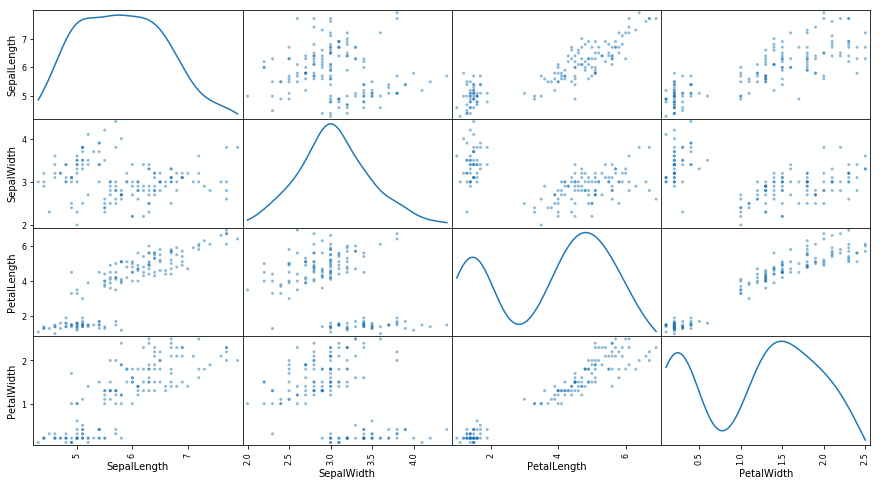

In [24]:
pd.plotting.scatter_matrix(df, figsize=(15,8), alpha=0.5, diagonal='kde');

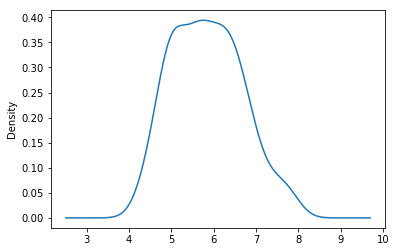

In [25]:
df.SepalLength.plot.kde()

## Plotting 2

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [27]:
# Create a trace
trace = go.Scatter(
    x = df.PetalWidth,
    y = df.PetalLength,
    mode = 'markers'
)

data = [trace]

iplot(data, filename='basic-scatter')

In [28]:
# Create a trace

data = []

for name, color in {'Iris-setosa': 'green', 'Iris-versicolor': 'blue', 'Iris-virginica': 'red'}.items():
    trace = go.Scatter3d(
        x = df[df.Name == name].PetalWidth,
        y = df[df.Name == name].PetalLength,
        z = df[df.Name == name].SepalWidth,
        mode = 'markers',
        marker = dict(
            size=5,
            color=color,
            opacity=0.5
        ),
        name=name
    )

    data.append(trace)


iplot(data, filename='basic-scatter')